**Importing Python Libraries**

In [ ]:
import numpy as np
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
import random as rn
import math

**Data Importing**

In [ ]:
df = pd.read_csv('FUDS25.csv')
df.head()

,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),A,SOC,SOC%
0,0.000000,3.411755,0.000000,0.0,0.0,1.0,100.0
1,0.999834,3.517305,0.002782,0.0,0.0,1.0,100.0
2,0.999834,3.527665,0.005563,0.0,0.0,1.0,100.0
3,0.999834,3.535598,0.008341,0.0,0.0,1.0,100.0
4,1.000014,3.542073,0.011118,0.0,0.0,1.0,100.0


In [ ]:
X =df.drop(['Charge_Capacity(Ah)','Discharge_Capacity(Ah)', 'A', 'SOC', 'SOC%'], axis=1)
X = X.dropna()
print(X)

      Current(A)  Voltage(V)
0       0.000000    3.411755
1       0.999834    3.517305
2       0.999834    3.527665
3       0.999834    3.535598
4       1.000014    3.542073
...          ...         ...
6855   -3.999612    3.359466
6856   -2.531439    3.460645
6857   -3.999612    3.357523
6858   -3.018723    3.423735
6859   -3.999612    3.354286

[6860 rows x 2 columns]


**Moving Average Filter for Input Quantities**

In [ ]:
L=6860 #L-point filter
b = (np.ones(L))/L #numerator co-effs of filter transfer function
a = 1  #denominator co-effs of filter transfer function
Xf = signal.lfilter(b,a,X) #filter output using lfilter function
print(Xf)

[[ 0.00000000e+00  4.97340426e-04]
 [ 1.45748353e-04  6.58474980e-04]
 [ 1.45748353e-04  6.59985289e-04]
 ...
 [-5.83033763e-04 -9.35988593e-05]
 [-4.40047051e-04  5.90396691e-05]
 [-5.83033763e-04 -9.40708308e-05]]


             0         1
0     0.000000  0.000497
1     0.000146  0.000658
2     0.000146  0.000660
3     0.000146  0.000661
4     0.000146  0.000662
...        ...       ...
6855 -0.000583 -0.000093
6856 -0.000369  0.000135
6857 -0.000583 -0.000094
6858 -0.000440  0.000059
6859 -0.000583 -0.000094

[6860 rows x 2 columns]


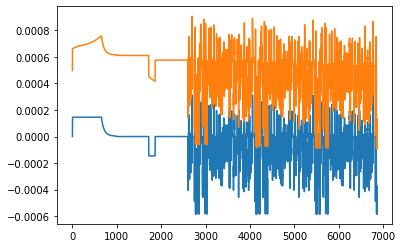

In [ ]:
Xf1 = pd.DataFrame(Xf)
print(Xf1)
plt.plot(Xf1)

**Data Normalization**

             0         1
0     0.302506  0.182055
1     0.628051  0.504114
2     0.628051  0.507133
3     0.628051  0.509444
4     0.628109  0.511383
...        ...       ...
6855 -0.999765 -0.998491
6856 -0.521729 -0.541251
6857 -0.999765 -0.999057
6858 -0.680388 -0.693978
6859 -0.999765 -1.000000

[6860 rows x 2 columns]


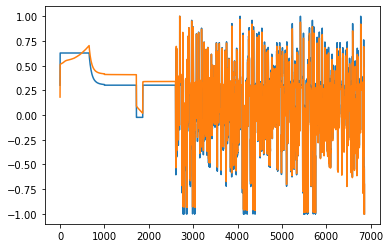

In [ ]:
df_min_max_scaled = Xf1.copy()  
# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = -1 + 2*(df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
    Xn = df_min_max_scaled.copy()
# view normalized data
print(Xn)
plt.plot(Xn)

In [ ]:
Y =df.drop(['Current(A)','Voltage(V)','Charge_Capacity(Ah)','Discharge_Capacity(Ah)','A','SOC%'], axis=1)
Y = Y.dropna()
print(Y)

               SOC
0     1.000000e+00
1     1.000000e+00
2     1.000000e+00
3     1.000000e+00
4     1.000000e+00
...            ...
6855  3.287134e-03
6856  2.357365e-03
6857  1.687184e-03
6858  7.715350e-04
6859 -3.916370e-07

[6860 rows x 1 columns]


**Dataset Splitting into Training and Testing Data**

In [ ]:
from sklearn.model_selection import train_test_split
train_Xn, test_Xn, train_Y, test_Y = train_test_split(Xn, Y,train_size=0.7,test_size=0.3)
print("Labels for training and testing data")
print(train_Y)
print(test_Y)
print(train_Xn)
print(test_Xn)

Labels for training and testing data
           SOC
4322  0.363529
1974  0.653716
2417  0.653716
4565  0.329729
5677  0.157181
...        ...
18    1.000000
6716  0.026038
6604  0.036760
5586  0.171312
4223  0.378315

[4802 rows x 1 columns]
           SOC
6221  0.080786
4096  0.429083
3544  0.488526
4418  0.344988
3784  0.462081
...        ...
2326  0.653716
6072  0.100931
3603  0.483726
4323  0.363529
6676  0.032556

[2058 rows x 1 columns]
             0         1
4322  0.472332  0.451087
1974  0.302506  0.339354
2417  0.302506  0.339967
4565  0.302499  0.290579
5677  0.048574  0.020107
...        ...       ...
18    0.628051  0.517510
6716  0.238224  0.194293
6604  0.302499  0.257138
5586  0.457513  0.411319
4223 -0.053572 -0.056486

[4802 rows x 2 columns]
             0         1
6221  0.126139  0.089892
4096  0.302499  0.306285
3544 -0.385063 -0.350897
4418  0.096325  0.088730
3784 -0.203646 -0.179221
...        ...       ...
2326  0.302506  0.339967
6072 -0.236577 -0.257176
360

**Sigmoid Function**

In [ ]:
# defining the Sigmoid Function
def sigmoid (Xn):
    return 1/(1 + np.exp(-Xn))

# derivative of Sigmoid Function
def derivatives_sigmoid(Xn):
    return Xn * (1 - Xn)

**Initialization of Parameters**

In [ ]:
#Weights
w0 = 2*np.random.random((2, 3)) - 1 #for input   - 2 inputs, 1 outputs
w1 = 2*np.random.random((3, 3)) - 1 #for layer 1 - 2 inputs, 1 outputs
w2 = 2*np.random.random((3, 1)) - 1 #for layer 2 - 2 inputs, 1 outputs
#learning rate
n = 0.1
epoch = 500
hiddenlayer_neurons = 3
hiddenlayer = 2

In [ ]:
errors = []

**Feed-Forward Backpropagation**

In [ ]:
for i in range (epoch):

    #Feed forward network
    layer0 = train_Xn    #Input Layer
    layer1 = sigmoid(np.dot(layer0, w0))  #Hidden Layer 1
    layer2 = sigmoid(np.dot(layer1, w1))  #Hidden Layer 2
    layer3 = sigmoid(np.dot(layer2, w2))  #Output Layer 

    #Back propagation using gradient descent
    layer3_error = train_Y - layer3
    layer3_delta = layer3_error * derivatives_sigmoid(layer3)

    layer2_error = layer3_delta.dot (w2.T)
    layer2_delta = layer2_error * derivatives_sigmoid(layer2)

    layer1_error = layer2_delta.dot (w1.T)
    layer1_delta = layer1_error * derivatives_sigmoid(layer1)

    w2 += layer2.T.dot(layer3_delta) * n 
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n

    error = np.mean(np.abs(layer3_error))
    errors.append(error)

**Calculation of Accuracy of Training Model**

In [ ]:
accuracy_training = (1 - error) * 100

In [ ]:
print ("Training Accuracy of the model   " + str (round(accuracy_training,2)) + "%")

Training Accuracy of the model   SOC    76.9
dtype: float64%


**SOC Graph**

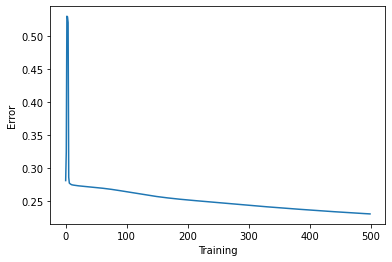

In [ ]:
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('Error')
plt.show()

**Mean Square Error Calculation**

In [ ]:
MSE = np.mean((train_Y - layer3)**2) # Mean Squared Error
print(MSE)
errors.append(MSE)

SOC    0.089634
dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(train_Y,layer3)

0.08963436584436803

**Absolute Error Calculation**

In [ ]:
print(error) # Absolute Error Value

SOC    0.230968
dtype: float64


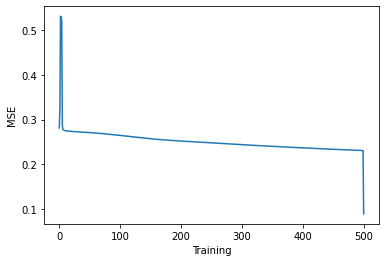

In [ ]:
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('MSE')# SOC 
plt.show()

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(train_Y,layer3)
layer2n = linear_regressor.predict(train_Y)

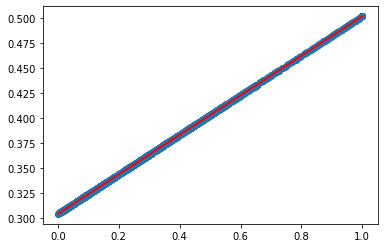

In [ ]:
plt.scatter(train_Y,layer2n)
plt.plot(train_Y, layer2n, color='red')
plt.show()

**Testing Part**

In [ ]:
#Testing
layer0t = test_Xn

layer1t = sigmoid(np.dot(layer0t, w0))
layer2t = sigmoid(np.dot(layer1t, w1))
layer3t = sigmoid(np.dot(layer2t, w2))

layer3t_error = test_Y - layer3t
error = np.mean(np.abs(layer3t_error))
errors.append(error)

**Testing Accuracy Calculation**

In [ ]:
accuracy_testing = (1 - error) * 100

In [ ]:
print ("Testing Accuracy of the model   " + str (round(accuracy_testing,2)) + "%")

Testing Accuracy of the model   SOC    76.49
dtype: float64%


**SOC error Graph**

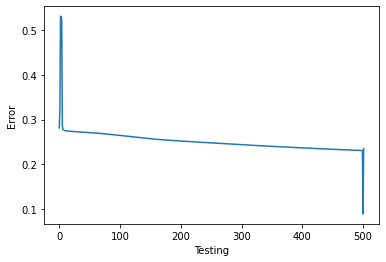

In [ ]:
plt.plot(errors)
plt.xlabel('Testing')
plt.ylabel('Error')
plt.show()

**Mean Square Error**

In [ ]:
MSE_T = np.mean((test_Y - layer3t)**2) # Mean Squared Error
print(MSE_T)
errors.append(MSE_T)

SOC    0.091605
dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_Y,layer3t)

0.045471820893367654

**Mean Absolute Error**

In [ ]:
print(error) # Absolute Error Value

SOC    0.235136
dtype: float64


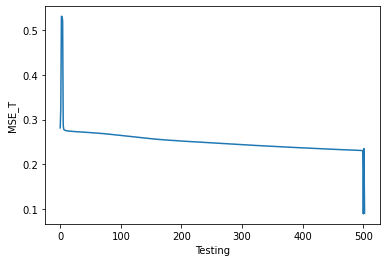

In [ ]:
plt.plot(errors)
plt.xlabel('Testing')
plt.ylabel('MSE_T')# SOC 
plt.show()